# Identificar fronteras no lineales

In [1]:
from sklearn.datasets.samples_generator import make_blobs, make_circles
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC

In [2]:
def plt_svc(model, ax = None, plot_support = True):
    """ Plot de la función de la decisión para una clasificación en 2D con SVC. """
    if ax is None:
        ax = plt.gca() # Adapatar los ejes de manera apropiada
        # Signature: plt.gca(**kwargs)
        # Get the current :class:`~matplotlib.axes.Axes` instance on the
        # current figure matching the given keyword args, or create one.
        ### Examples
        #To get the current polar axes on the current figure::
        #    plt.gca(projection='polar')
        #If the current axes doesn't exist, or isn't a polar one, the appropriate
        #axes will be created and then returned.
    xlim = ax.get_xlim() # Obtener límites de los ejes para hacer puntos  ---> (0.0, 1.0)
    ylim = ax.get_ylim() # Obtener límites de los ejes para hacer puntos  ---> (0.0, 1.0)
    xx = np.linspace(xlim[0], xlim[1],30)
    yy = np.linspace(ylim[0], ylim[1],30)
    Y, X = np.meshgrid(yy,xx)
    # Ejemplo de np.meshgrid()
    # nx, ny = (3, 2)
    # x = np.linspace(0, 1, nx)
    # y = np.linspace(0, 1, ny)
    # xv, yv = np.meshgrid(x, y)
    # xv
    # array([[ 0. ,  0.5,  1. ],
    #       [ 0. ,  0.5,  1. ]])
    # yv
    # array([[ 0.,  0.,  0.],
    #       [ 1.,  1.,  1.]])
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    # Ejemplo de np.vstack
    # a = np.array([1, 2, 3])
    # b = np.array([2, 3, 4])
    # np.vstack((a,b))
    # array([[1, 2, 3],
    #  [2, 3, 4]])
    
    P = model.decision_function(xy).reshape(X.shape)
    # Hacer un reshape para aplicar la función de decisión. Como arriba cuando hicimos el predict
    
    # Representamos las fronteras y márgenes del SVC
    ax.contour(X, Y, P, colors = "k", levels = [-1,0,1], alpha = 0.5, linestyles = ["--","-","--"])

    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s = 300, lw = 1, facecolors = "black")
    # Definimos de nuevo los límites por si se cambiaron durante el proceso
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [3]:
X, Y = make_circles(n_samples=100,factor = 0.1, noise = 0.1)

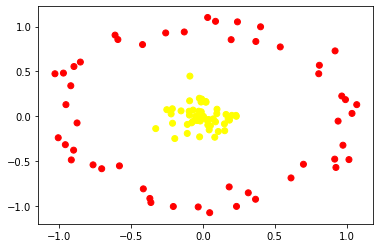

In [4]:
plt.scatter(X[:,0],X[:,1], c = Y, cmap = "autumn")
plt.show()

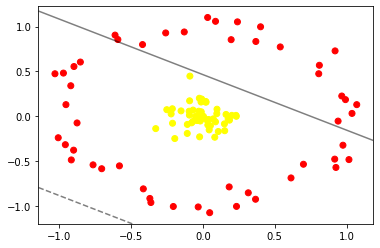

In [5]:
model = SVC(kernel = "linear")
model.fit(X,Y)
plt.scatter(X[:,0],X[:,1], c = Y, cmap = "autumn")
plt_svc(model,plot_support = False)

##### Se puede apreciar que un kernel lineal no es la solución. Lo que podría funcionar, sería; elevar la dimensión en la que los datos se encuentran como si fuesen una proyección de una dimensión superior en un espacio 2D, a partir de eso, una recta o más bien un plano podría funcionar.

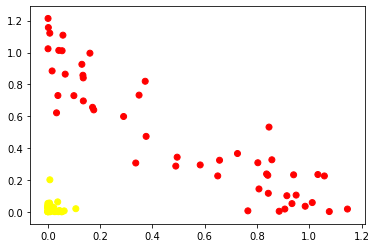

In [6]:
plt.scatter(X[:,0]**2,X[:,1]**2, c = Y, cmap = "autumn")
plt.show()

In [7]:
r = np.exp(-X**2).sum(1)
r

array([1.99064641, 1.98934413, 1.81020329, 1.95985266, 1.96862281,
       1.32083884, 1.45962054, 1.12955122, 1.30118962, 1.93979273,
       1.99697772, 1.97373875, 1.35688808, 1.30357239, 1.96376222,
       1.22182005, 1.3121834 , 1.97273554, 1.33975835, 1.9505253 ,
       1.18603301, 1.94815513, 1.30507197, 1.18357026, 1.98972164,
       1.87942108, 1.31807509, 1.97435521, 1.3636193 , 1.9623118 ,
       1.24208805, 1.29857865, 1.98852829, 1.95143057, 1.17781966,
       1.96014572, 1.35833257, 1.96437717, 1.31956563, 1.94903405,
       1.99616216, 1.99810359, 1.40973732, 1.9968815 , 1.22654279,
       1.39651665, 1.99946586, 1.32059194, 1.45057846, 1.31038688,
       1.31254207, 1.96001075, 1.95189685, 1.30780819, 1.99740609,
       1.99742748, 1.38723715, 1.97495167, 1.01668477, 1.38715963,
       1.36159401, 1.22048417, 1.99982133, 1.14754411, 1.95231686,
       1.99390106, 1.98786303, 1.99997923, 1.27383412, 1.90267862,
       1.32176802, 1.99180797, 1.99603877, 1.14603578, 1.94727

In [8]:
from mpl_toolkits import mplot3d

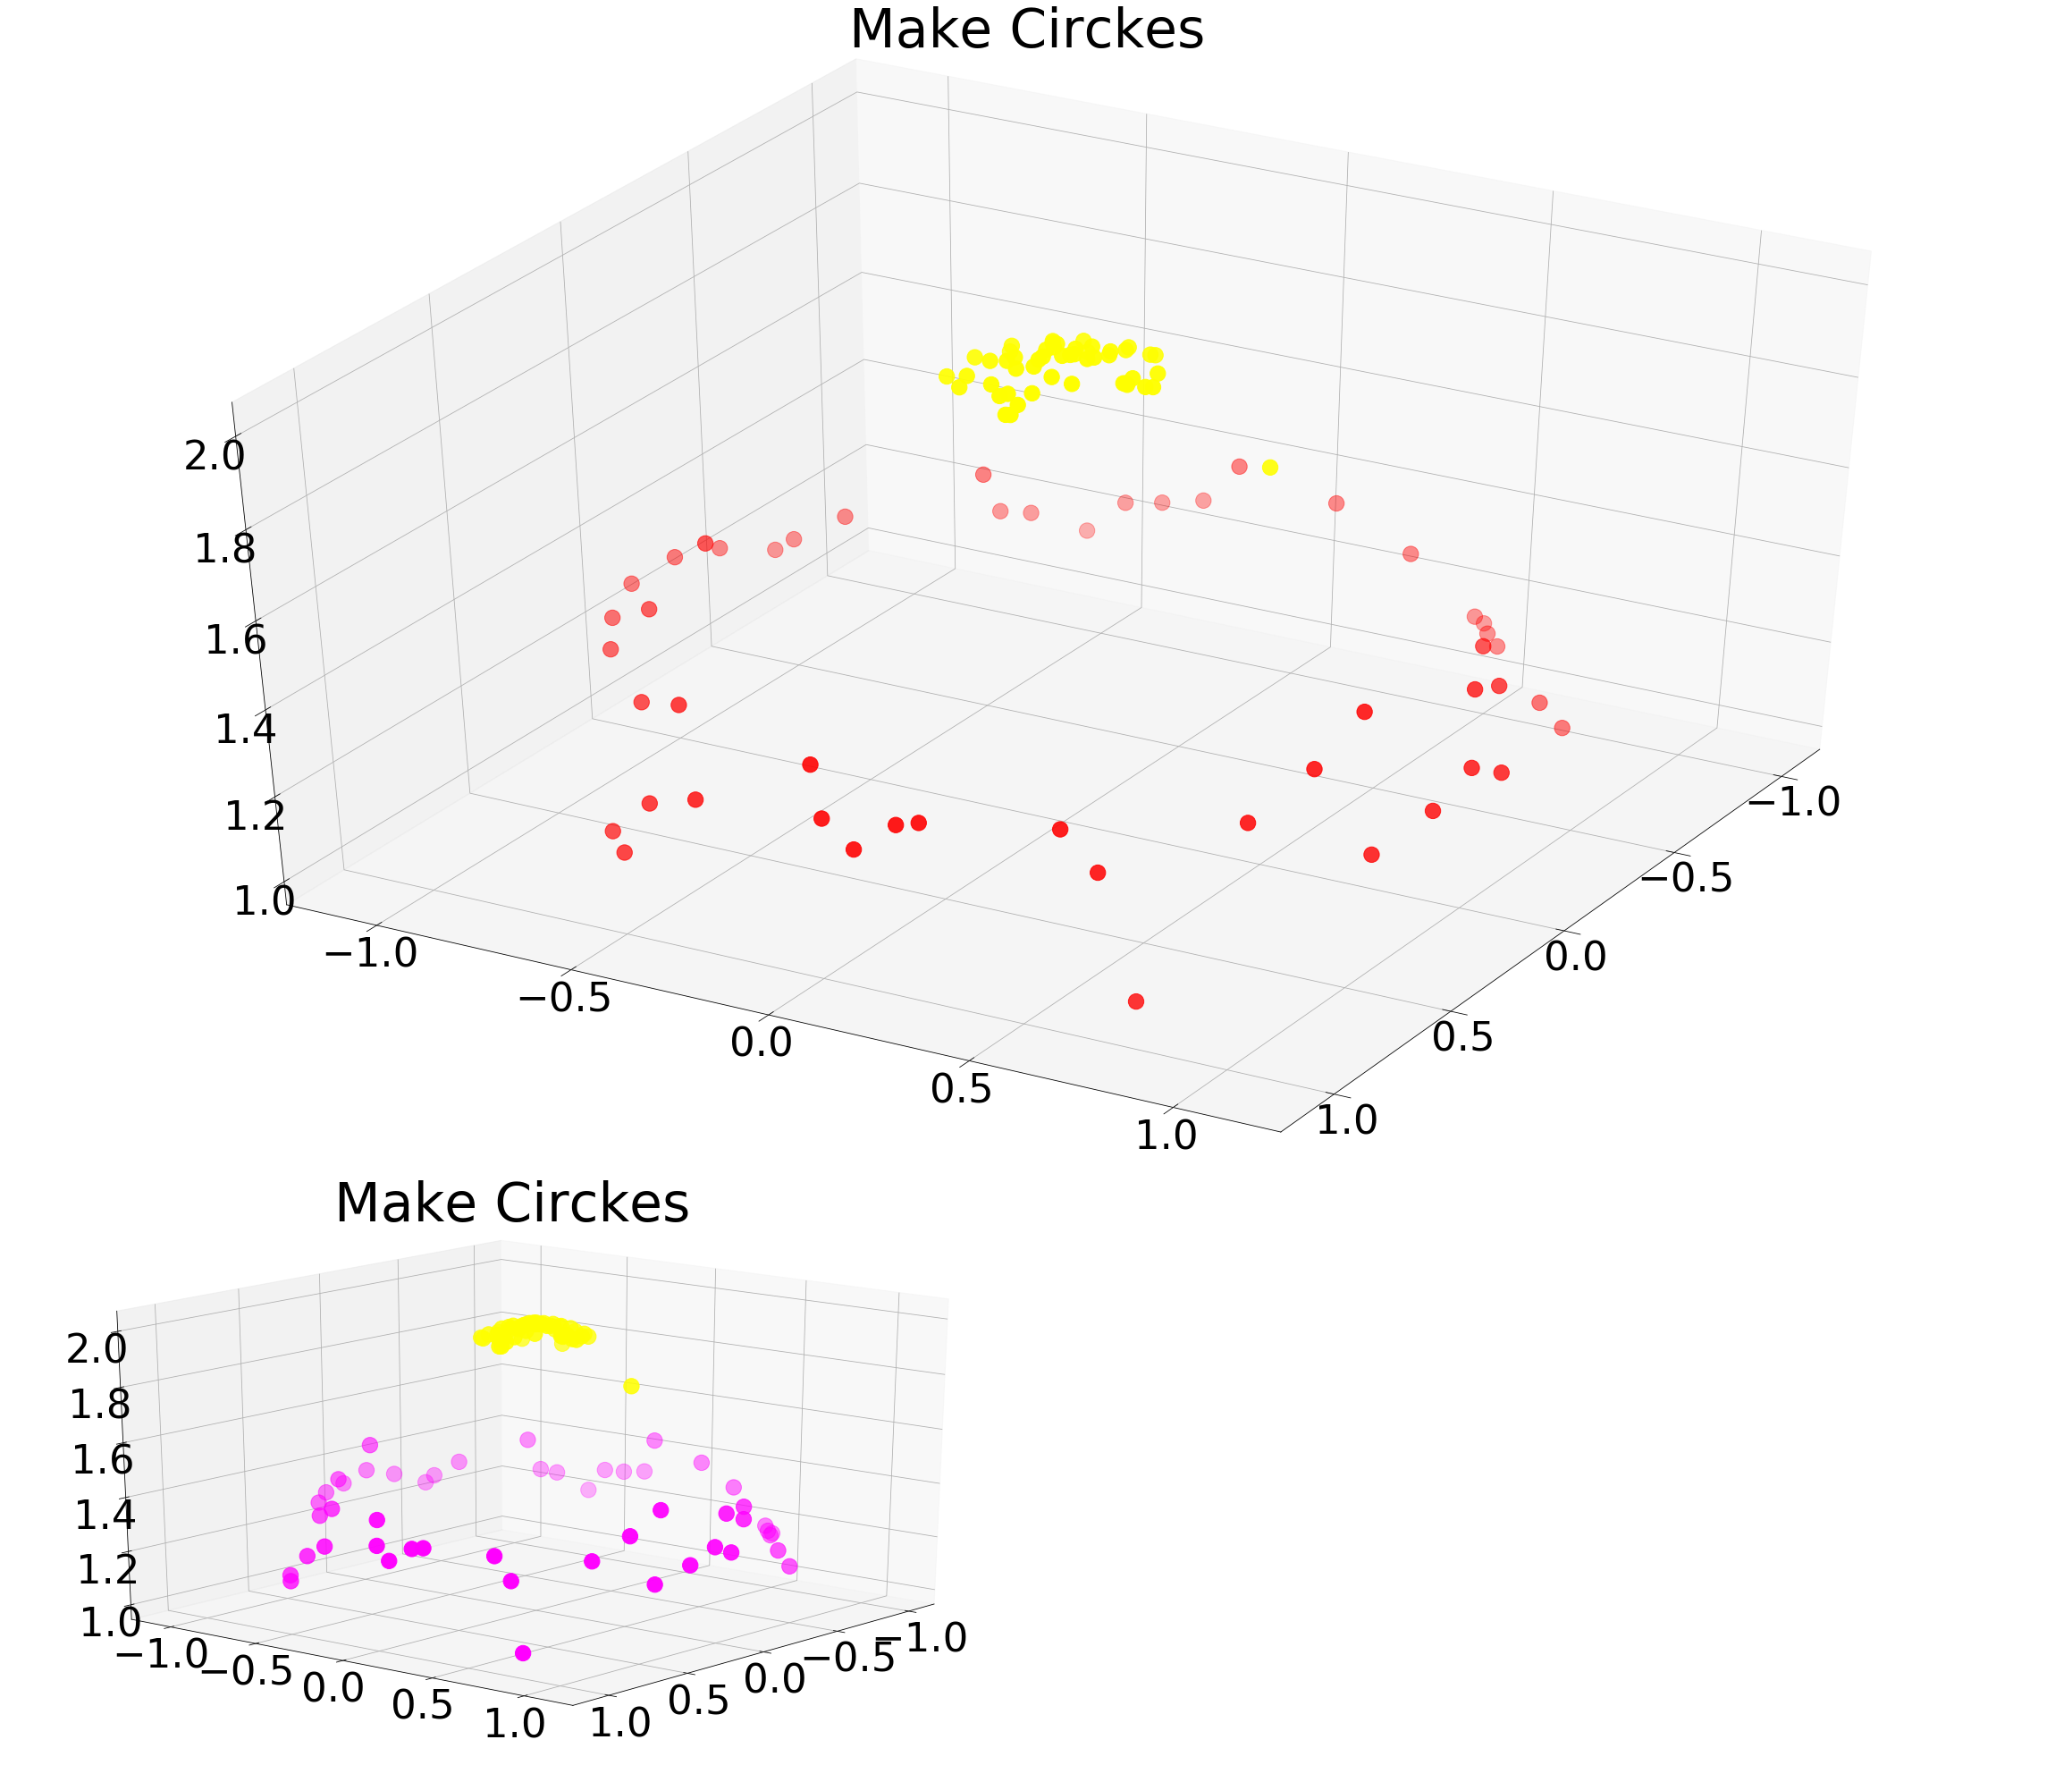

In [9]:
# Los datos en una visualización 3D. Los mismo datos, pero con una elevación distint
fig = plt.figure(figsize = (16,9))
axes = fig.add_axes([1,1,1,1],projection = "3d") 
axes.scatter3D(X[:,0],X[:,1], r, c =Y, s = 300, cmap = "spring")
axes.view_init(elev = 20, azim = 40)
axes.set_title("Make Circkes ", size = 60)
axes.tick_params(labelsize = 45)
axes1 = fig.add_axes([1,2,2,2],projection = "3d") 
axes1.scatter3D(X[:,0],X[:,1], r, c =Y, s = 300, cmap = "autumn")
axes1.view_init(elev = 40, azim = 30)
axes1.set_title("Make Circkes \n", size = 60)
axes1.tick_params(labelsize = 45)
plt.show()

In [10]:
def plot_3d(elev = 0, azim = 110, X = X, Y = Y , r = r):
    fig = plt.figure(figsize = (16,9))
    axes = fig.add_axes([1,1,1,1], projection = "3d")
    axes.tick_params(labelsize = 15)
    axes.scatter3D(X[:,0],X[:,1], r, c = Y, s = 100, cmap= "autumn")
    axes.view_init(elev = elev, azim = azim)
    
    axes.set_xlabel("\n X", size = 20)
    axes.set_ylabel(" \n Y", size = 20)
    axes.set_zlabel("\n Z", size = 20)

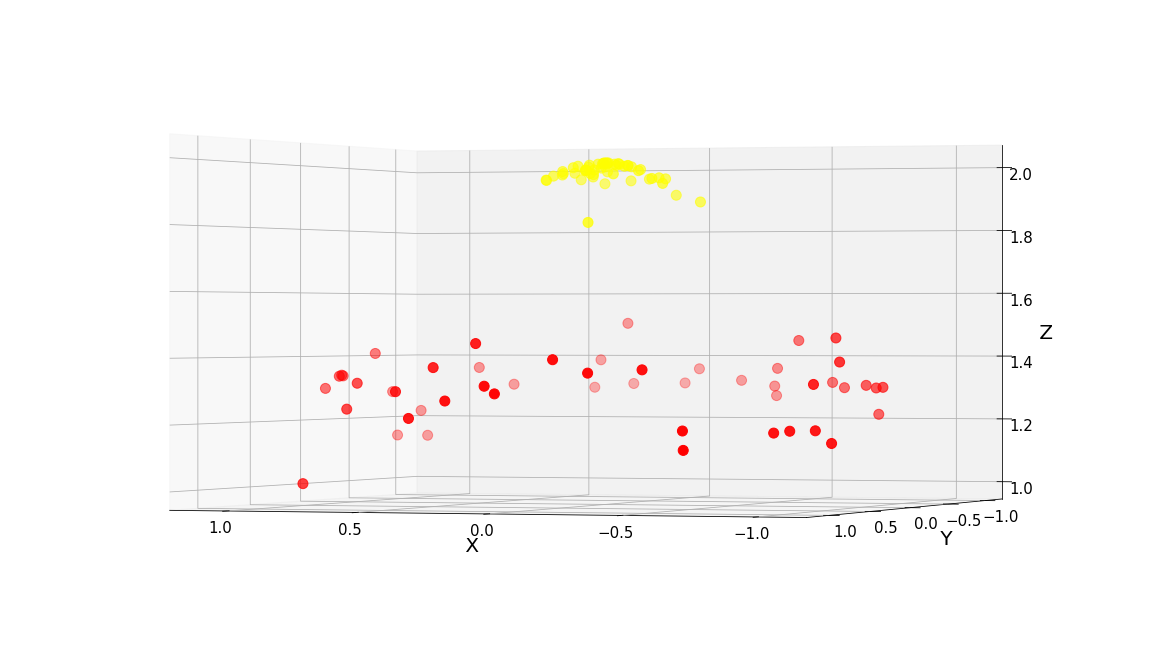

In [11]:
plot_3d()

In [12]:
from ipywidgets import interact, fixed

In [13]:
interact(plot_3d,elev = [l for l in range(-90,90,10)], azim = [l for l in range(-180,180,10)], X = fixed(X),
         Y = fixed(Y), r = fixed(r))
plt.show()

interactive(children=(Dropdown(description='elev', index=9, options=(-90, -80, -70, -60, -50, -40, -30, -20, -…

In [14]:
rbf = SVC(C = 1e6, gamma = "scale")
rbf.fit(X,Y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

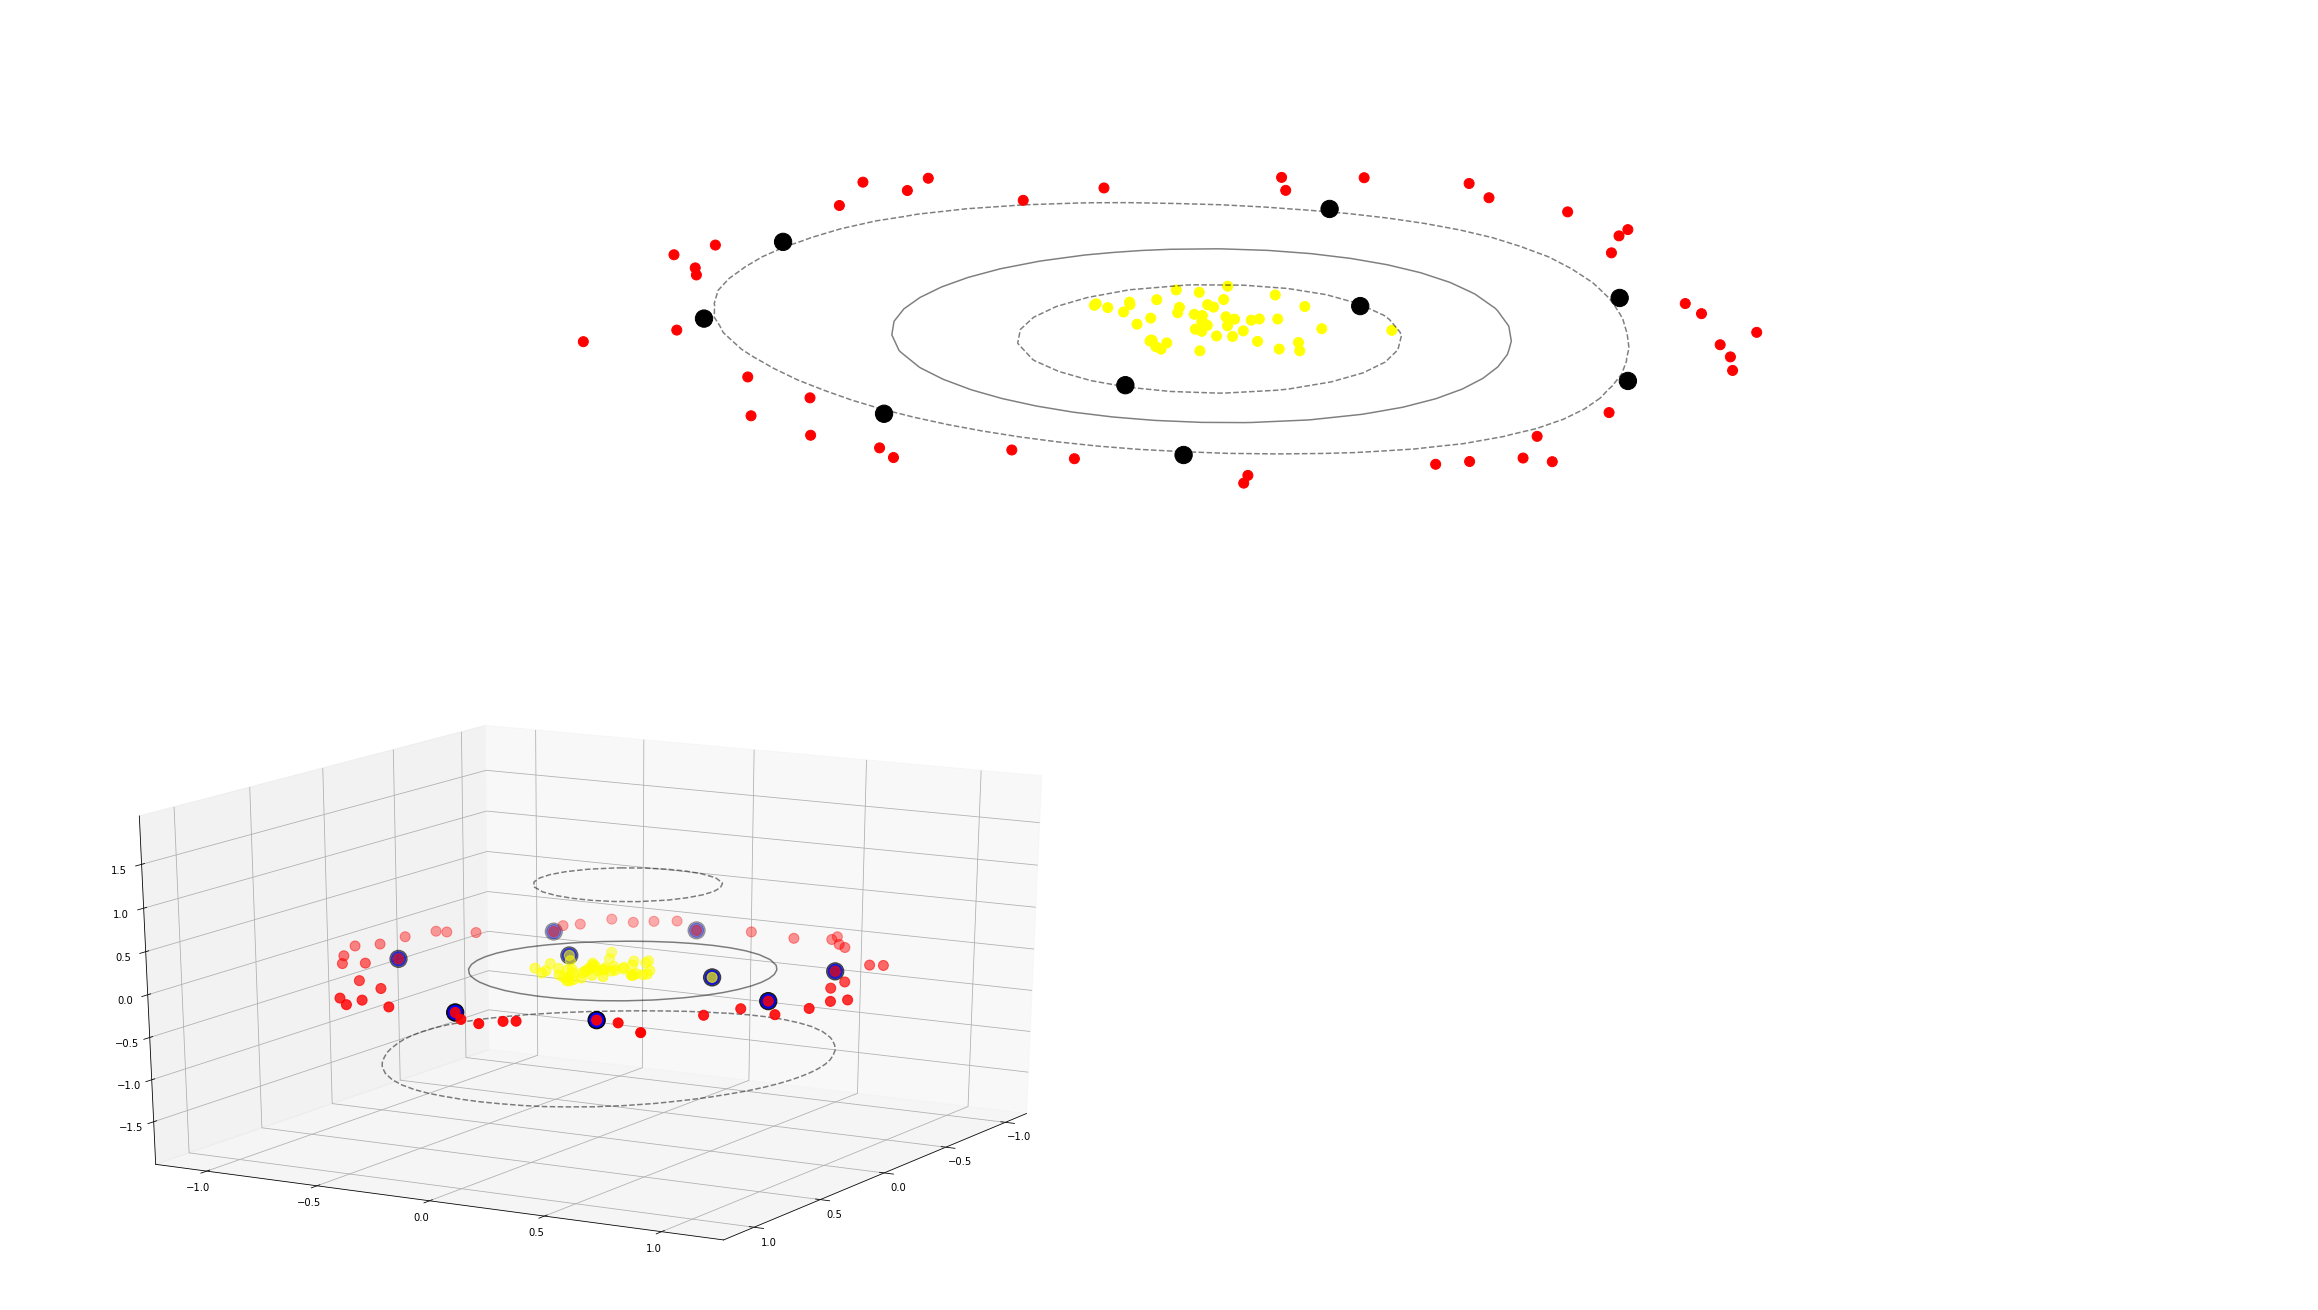

In [15]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_axes([1,2,2,1], projection = "3d") 
ax.scatter3D(X[:,0],X[:,1], c = Y, s = 100, cmap = "autumn")
plt_svc(rbf)
ax.view_init(elev=90,azim=3000)
ax.set_axis_off()

ax = fig.add_axes([1,1,1,1], projection = "3d") 
ax.scatter3D(X[:,0],X[:,1], c = Y, s = 100, cmap = "autumn")
plt_svc(rbf)
ax.scatter3D(rbf.support_vectors_[:,0],rbf.support_vectors_[:,1], s = 200, facecolors = "blue")
ax.view_init(elev=20,azim=30)


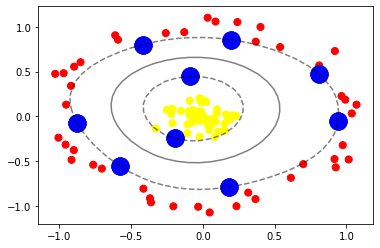

In [16]:
plt.scatter(X[:,0],X[:,1], s = 50, c = Y, cmap = "autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0],rbf.support_vectors_[:,1], s = 300, facecolors = "blue")

## Ajustar los parámetros de SVM

In [17]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std = 1)

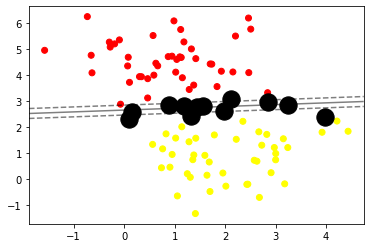

In [18]:
plt.scatter(X[:,0],X[:,1], c = Y, cmap = "autumn")
model = SVC(kernel = "linear", C = 1e6)
model.fit(X,Y)
plt_svc(model)

In [19]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std = .5)

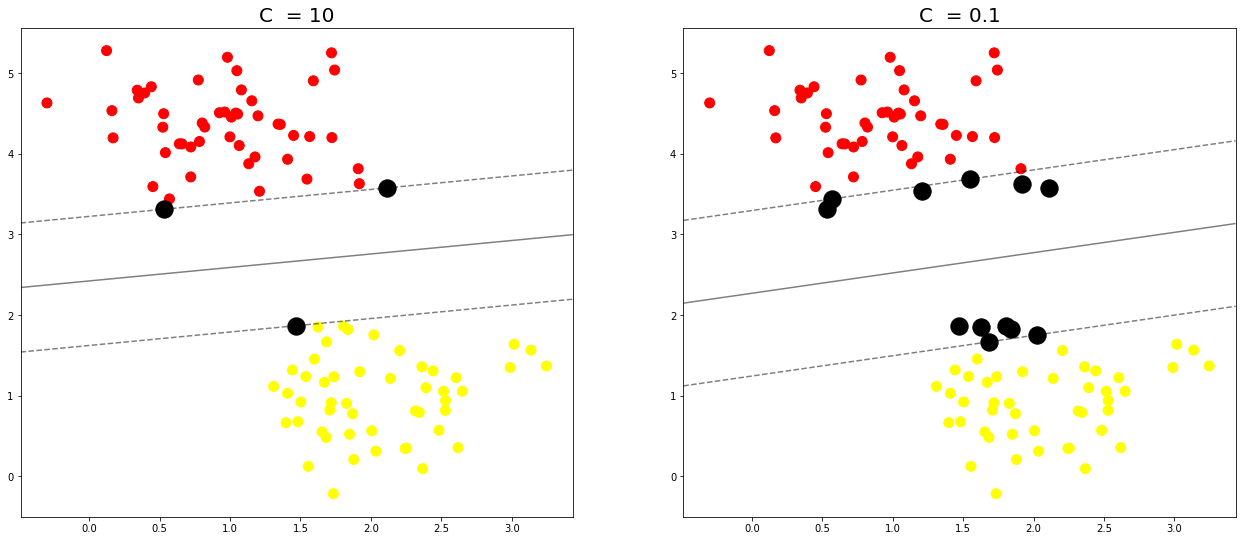

In [20]:
fig, ax = plt.subplots(1,2, figsize = (9,9))
plt.subplots_adjust(right=2.)

for a_x, C in zip(ax,[10,.1]):
    model = SVC(kernel="linear", C = C)
    model.fit(X,Y)
    a_x.scatter(X[:,0],X[:,1], c = Y, s = 100, cmap = "autumn")
    plt_svc(model, a_x)
    a_x.set_title(f"C  = {C}", size = 20)